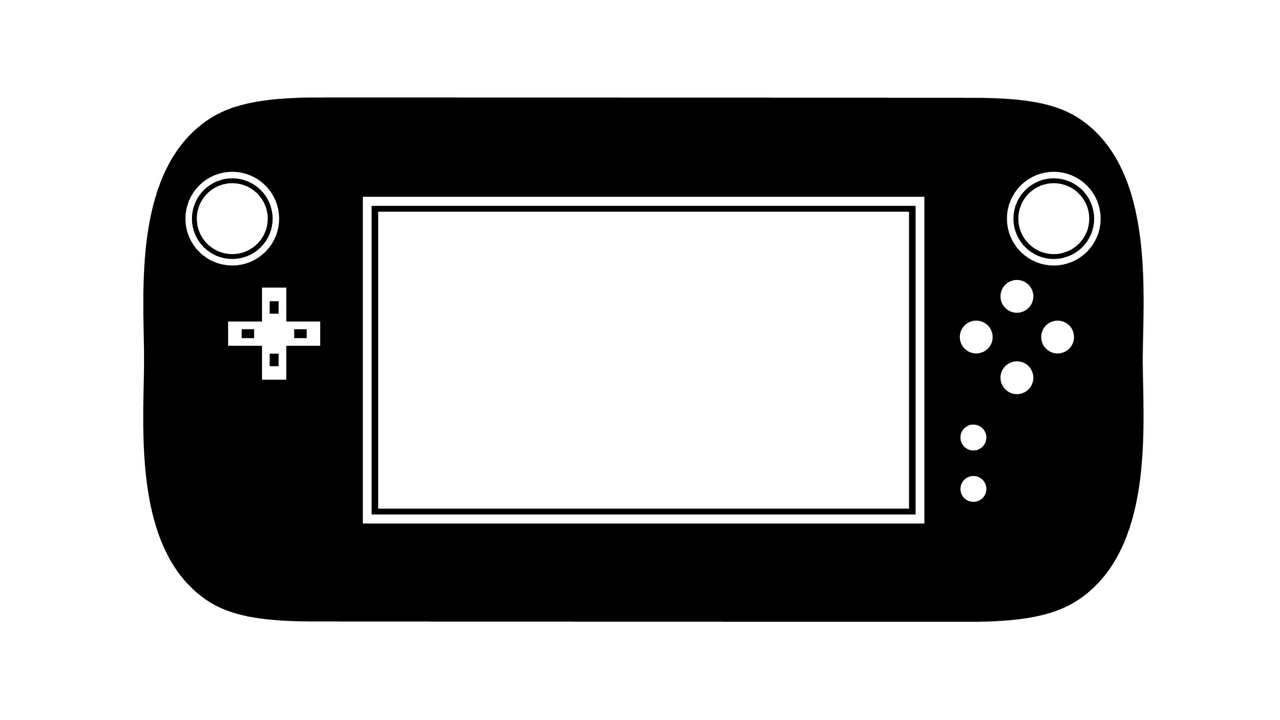

De niño recuerdo ser un activo jugador de videojuegos, me gustaba jugar juegos como el mario kart, halo, super smash, etc. Siempre disfrutaba jugar con mis amigos y pasar un buen rato juntos. Además, los videojuegos son una industria que en todos los estudios es considerada como una de las que más dinero genera, incluso superando a Hollywood. Por esas razones me decidí a hacer este proyecto sobre las ventas de videojuegos en diversas regiones del mundo y a nivel mundial. 

En este proyecto me concentraré en analizar cúales son los géneros de videojuegos que más se venden a nivel mundial, cúales son las empresas que más ventas tienen en esta industria y las consolas de videojuegos en las que se vendern más videojuegos.

Debido al gran crecimiento y potencial económico de esta industria, decidí realizar mi proyecto de visualización con un dataset sobre las ventas de diversos videojuegos a través de los años. Con este proyecto busco conocer cúales son los videojuegos con mayores ventas, las empresas que más ventas han logrado en la industria y las consolas que más se venden en el mercado

Este dataset contiene una lista con más de diez mil nombres de juegos, los campos incluyen:


    *Rank - El ranking de los juegos más vendidos
    *Name - El nombre del juego
    *Platform - Consola del juego(Wii, Xbox, etc)
    *Year - Año en que se lanzó el juego
    *Genre - Género del videojuego
    *Publisher - Compañía que lanza el juego
    *NA_Sales - Ventas en Norteamérica(en millones)
    *EU_Sales - Ventas en Europa(en millones)
    *JP - Ventas en Japón(en millones)
    *Other_Sales - Ventas en el resto del mundo (en millones)
    *Global_Sales - Total de ventas en el mundo(en millones)

In [30]:
#importamos las librerias
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns;
import plotly.express as px
from plotly.offline import iplot
import plotly.graph_objs as go
from plotly import tools
from plotly.subplots import make_subplots

### Cargar los datos

In [14]:
df = pd.read_csv("vgsales.csv")


## Dimensiones y tipo de datos

In [15]:
df.head(10)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


In [16]:
df.tail(10)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
16588,16591,Mega Brain Boost,DS,2008.0,Puzzle,Majesco Entertainment,0.01,0.00,0.00,0.0,0.01
16589,16592,Chou Ezaru wa Akai Hana: Koi wa Tsuki ni Shiru...,PSV,2016.0,Action,dramatic create,0.00,0.00,0.01,0.0,0.01
16590,16593,Eiyuu Densetsu: Sora no Kiseki Material Collec...,PSP,2007.0,Role-Playing,Falcom Corporation,0.00,0.00,0.01,0.0,0.01
16591,16594,Myst IV: Revelation,PC,2004.0,Adventure,Ubisoft,0.01,0.00,0.00,0.0,0.01
16592,16595,Plushees,DS,2008.0,Simulation,Destineer,0.01,0.00,0.00,0.0,0.01
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.0,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.0,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.0,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.0,0.01
16597,16600,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.00,0.0,0.01


### Dimensiones(renglones, columnas)

In [10]:
df.shape

(16598, 11)

### Tipo de dato de cada columna

In [18]:
df.dtypes

Rank              int64
Name             object
Platform         object
Year            float64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

In [19]:
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


### Valores ausentes

In [23]:
df.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [24]:
MissingValues = round(df.isnull().sum()/len(df)*100,3)
MissingValues = MissingValues.astype(str)+"%"
MissingValues

Rank              0.0%
Name              0.0%
Platform          0.0%
Year            1.633%
Genre             0.0%
Publisher       0.349%
NA_Sales          0.0%
EU_Sales          0.0%
JP_Sales          0.0%
Other_Sales       0.0%
Global_Sales      0.0%
dtype: object

Observamos que en las variables "Platform" y "Publisher" obtuvimos valores nulos, proseguiré a eliminarlos.

In [26]:
df = df.dropna()

In [27]:
df.isnull().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

Eliminamos todos los valores nulos

In [28]:
df.dtypes

Rank              int64
Name             object
Platform         object
Year            float64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

In [57]:
fig = go.Figure()
fig = make_subplots(rows=3, 
                    cols=2, 
                    subplot_titles=("Histogram Year", 
                                    "Histogram NA Sales",
                                    "Histogram EU Sales",
                                    "Histogram JP Sales",
                                    "Histogram Other Sales",
                                    "Histogram Global Sales"))

fig.add_trace(go.Histogram(x=df['Year'].values), 1, 1)
fig.add_trace(go.Histogram(x=df['NA_Sales'].values), 1, 2)
fig.add_trace(go.Histogram(x=df['EU_Sales'].values), 2, 1)
fig.add_trace(go.Histogram(x=df['JP_Sales'].values), 2, 2)
fig.add_trace(go.Histogram(x=df['Other_Sales'].values), 3, 1)
fig.add_trace(go.Histogram(x=df['Global_Sales'].values), 3, 2)

fig.update_layout(showlegend=True, title_text="Datos venta de videojuegos ")

fig.show()

Hacemos las gráficas correspondientes a las variables númericas del dataset

In [65]:
fig = go.Figure()
fig = make_subplots(rows=2, 
                    cols=2, 
                    subplot_titles=("Gráfica Nombre", 
                                    "Gráfica Plataforma", 
                                    "Gráfica Género",
                                    "Gráfica Empresa"))

#Nombre 
NameCount = df["Name"].value_counts().head(5)
NameV = NameCount.index.unique()
fig.add_trace(go.Bar(x=NameV, y = NameCount, text=NameCount), 1, 1)

#Plataforma
PCount = df["Platform"].value_counts().head(5)
PV = PCount.index.unique()
fig.add_trace(go.Bar(x=PV, y = PCount, text=PCount), 1, 2)

#Género
GCount = df["Genre"].value_counts().head(5)
GV = GCount.index.unique()
fig.add_trace(go.Bar(x=GV, y = GCount, text=GCount), 2, 1)

#Empresa
ECount = df["Publisher"].value_counts().head(5)
EV = ECount.index.unique()
fig.add_trace(go.Bar(x=EV, y = ECount, text=ECount), 2, 2)

fig.update_traces(texttemplate='%{text}', 
                  textposition='auto')
fig.update_yaxes(automargin=True)
fig.update_layout(height=1000, 
                  width=1050,
                  showlegend=False, 
                  uniformtext_minsize=2, 
                  uniformtext_mode='hide',
                  title_text="Ventas de videojuegos gráficas de barras ")
fig.show()

Realizamos las gráficas correspondientes a las variables tipo objeto del dataset

## Preguntas para responder

In [66]:
df.head(5)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


Ya que el dataset esta ordenado de mayor a menor respecto a las ventas, estos serían los 5 juegos más vendidos

In [69]:
df.tail(5)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.0,0.0,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.0,0.0,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.0,0.0,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.0,0.0,0.01
16597,16600,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.0,0.0,0.01


Ya que el dataset esta ordenado de mayor a menor respecto a las ventas, estos serían los 5 juegos menos vendidos

## Género de videojuegos con más ventas

In [48]:
gventas =  df.groupby('Genre')['Global_Sales'].sum().reset_index().sort_values("Global_Sales",ascending=False)
gventas = gventas.reset_index()
gventas.drop("index",axis = 1,inplace=True)

In [93]:
fig = go.Figure()

# Add Traces

fig.add_trace(
    go.Bar(x=gventas['Genre'][:5],
           y=gventas['Global_Sales'][:5],
           name="Top 5",
          marker={'color': pventas['Global_Sales'][:5],'colorscale': 'Oranges'}))
fig.add_trace(
    go.Bar(x=gventas['Genre'][:10],
           y=gventas['Global_Sales'][:10],
           name="Top 10",
           marker={'color': gventas['Global_Sales'][:10],'colorscale': 'Oranges'},
           visible=False))
fig.add_trace(
    go.Bar(x=gventas['Genre'][:20],
           y=gventas['Global_Sales'][:20],
           name="Top 20",
           marker={'color': pventas['Global_Sales'][:20],'colorscale': 'Oranges'},
           visible=False))

fig.add_trace(
    go.Bar(x=gventas['Genre'],
           y=gventas['Global_Sales'],
           name="Todos",
           marker={'color': pventas['Global_Sales'],'colorscale': 'Oranges'},
               visible=False ))
fig.update_layout(
    updatemenus=[
        dict(
            type="buttons",
            direction="right",
            active=0,
            x=0.57,
            y=1.2,
            buttons=list([
                dict(label="Top 5",
                     method="update",
                     args=[{"visible": [True, False,False, False]},
                           {"title": "Top 5 géneros"}]),
                dict(label="Top 10",
                     method="update",
                     args=[{"visible": [False,True, False, False]},
                           {"title": "Top 10 géneros"}]),
                dict(label="Top 20",
                     method="update",
                     args=[{"visible": [False,False, True,False]},
                           {"title": "Top 20 géneros"}]),
                dict(label="Todos",
                     method="update",
                     args=[{"visible": [False,False, False,True]},
                           {"title": "Todas los géneros"}]),
            ]),
        )
    ])
# Set title
fig.update_layout(
    title_text="Ventas por genero",
    xaxis_domain=[0.05, 1.0]
)

fig.show()

Podemos observar que el género más vendido es el género de acción, seguido del de deportes, también la gráfica nos permite observar cuanto venden todos los géneros agrupandolos por 5, 10, 20 y todos los géneros

## Ventas por compañía

In [84]:
cventas =  df.groupby('Publisher')['Global_Sales'].sum().reset_index().sort_values("Global_Sales",ascending=False)
cventas = cventas.reset_index()
cventas.drop("index",axis = 1,inplace=True)

In [92]:
# Initialize figure
fig = go.Figure()

# Add Traces

fig.add_trace(
    go.Bar(x=cventas['Publisher'][:10],
           y=cventas['Global_Sales'][:10],
           name="Top 10",
          marker={'color': cventas['Global_Sales'][:10],'colorscale': 'Sunsetdark'}))
fig.add_trace(
    go.Bar(x=cventas['Publisher'][:50],
           y=cventas['Global_Sales'][:50],
           name="Top 50",
           marker={'color': cventas['Global_Sales'][:50],'colorscale': 'Sunsetdark'},
           visible=False))

fig.add_trace(
    go.Bar(x=cventas['Publisher'][:100],
           y=cventas['Global_Sales'][:100],
           name="Top 100",
           marker={'color': cventas['Global_Sales'][:100],'colorscale': 'Sunsetdark'},
           visible=False))

fig.add_trace(
    go.Bar(x=cventas['Publisher'][:500],
           y=cventas['Global_Sales'][:500],
           name="Top 500",
           marker={'color': cventas['Global_Sales'][:500],'colorscale': 'Sunsetdark'},
           visible=False))

fig.add_trace(
    go.Bar(x=cventas['Publisher'],
           y=cventas['Global_Sales'],
           name="Todas",
           marker={'color': cventas['Global_Sales'],'colorscale': 'Sunsetdark'},
               visible=False ))

fig.update_layout(
    updatemenus=[
        dict(
            type="buttons",
            direction="right",
            active=0,
            x=0.57,
            y=1.2,
            buttons=list([
                dict(label="Top 10",
                     method="update",
                     args=[{"visible": [True, False,False, False, False]},
                           {"title": "Top 10 empresas"}]),
                dict(label="Top 50",
                     method="update",
                     args=[{"visible": [False,True, False, False, False]},
                           {"title": "Top 50 empresas"}]),
                dict(label="Top 100",
                     method="update",
                     args=[{"visible": [False,False, True, False, False]},
                           {"title": "Top 100 empresas"}]),
                dict(label="Top 500",
                     method="update",
                     args=[{"visible": [False,False, False, True, False]},
                           {"title": "Top 500 empresas"}]),
                dict(label="Todas",
                     method="update",
                     args=[{"visible": [False,False, False, False, True]},
                           {"title": "Todas las empresas"}]),
            ]),
        )
    ])

# Titulo
fig.update_layout(
    title_text="Empresas con más ventas",
    xaxis_domain=[0.05, 1.0]
)

fig.show()

### Ventas por consola

In [46]:
pventas =  df.groupby('Platform')['Global_Sales'].sum().reset_index().sort_values("Global_Sales",ascending=False)
pventas = pventas.reset_index()
pventas.drop("index",axis = 1,inplace=True)

In [91]:
fig = go.Figure()

# Agregar Traces

fig.add_trace(
    go.Bar(x=pventas['Platform'][:5],
           y=pventas['Global_Sales'][:5],
           name="Top 5",
          marker={'color': pventas['Global_Sales'][:5],'colorscale': 'Bluered'}))
fig.add_trace(
    go.Bar(x=pventas['Platform'][:10],
           y=pventas['Global_Sales'][:10],
           name="Top 10",
           marker={'color': pventas['Global_Sales'][:10],'colorscale': 'Bluered'},
           visible=False))
fig.add_trace(
    go.Bar(x=pventas['Platform'][:20],
           y=pventas['Global_Sales'][:20],
           name="Top 20",
           marker={'color': pventas['Global_Sales'][:20],'colorscale': 'Bluered'},
           visible=False))

fig.add_trace(
    go.Bar(x=pventas['Platform'],
           y=pventas['Global_Sales'],
           name="Todas",
           marker={'color': pventas['Global_Sales'],'colorscale': 'Bluered'},
               visible=False ))
fig.update_layout(
    updatemenus=[
        dict(
            type="buttons",
            direction="right",
            active=0,
            x=0.57,
            y=1.2,
            buttons=list([
                dict(label="Top 5",
                     method="update",
                     args=[{"visible": [True, False,False, False]},
                           {"title": "Top 5 Consolas"}]),
                dict(label="Top 10",
                     method="update",
                     args=[{"visible": [False,True, False, False]},
                           {"title": "Top 10 Consolas"}]),
                dict(label="Top 20",
                     method="update",
                     args=[{"visible": [False,False, True,False]},
                           {"title": "Top 20 Consolas"}]),
                dict(label="Todas",
                     method="update",
                     args=[{"visible": [False,False, False,True]},
                           {"title": "Todas las consolas"}]),
            ]),
        )
    ])
# Titulo
fig.update_layout(
    title_text="Ventas por consola",
    xaxis_domain=[0.05, 1.0]
)

fig.show()

En la gráfica podemos observar las consolas de videojuegos que tienen más videojuegos vendidos, se puede apreciar que el PS2 es la consola que más videojuegos ha vendido hasta el años 2016